# **Group 19 Project**  **GIVE BETTER TITLE**

# **Introduction**

Video games have evolved from simple pastimes into complex environments that offer rich data about user behavior and interaction. This report is grounded in a real-world data science project conducted by a research group in Computer Science at UBC, led by Frank Wood. The team has established a Minecraft server where every action taken by players is recorded. By capturing this data, the researchers aim to unlock insights into how individuals navigate and interact within virtual worlds.

The project has multiple objectives, and we will focus on understanding the characteristics and behaviors that most predict a player's likelihood to subscribe to a game-related newsletter. This targeted approach helps ensure that sufficient resources—such as software licenses and server hardware—are available to support the anticipated influx of players. By investigating player behavior through detailed analytics, the study aims to inform future strategies for engagement, recruitment, and resource allocation in online gaming communities. This report will detail the specific methodologies used to analyze the player data, the key findings related to newsletter subscription behavior, and the implications of these findings.

# **Question**

Are age and the number of hours played predictive of subscription status to a game-related newsletter in the player.csv data set?

## Data Set Description

There a two datasets containing information on players on the MineCraft server; "players.csv" and "sessions.csv". 

The "players.csv" dataset contains observations collected for multiple different variables from people who played on the MineCraft server. The data frame contains 7 variables and 196 rows of data, producing 1372 observations in total. The variables are ordered in the table left to right are:

- `Experience`
    - This variable describes the level at which each player is at in terms of playing the game.
    - This variable is represented by a string value that can be either Amateur, Beginner, Regular, Pro, or Veteran
- `Subscribe`
    - This variable describes whether or not the player is subscribed to a game-related newsletter.
    - This variable is represented by a boolean value (either True or False) 
- `Hashed Email`
    - This variable describes lists each players email in a hashed format. 
    - This variable is represented by a string  
- `Hours Played`
    - This variable describeshow many hours each player spent playing the game (in hours). 
    - This variable is represented by a float value (number with a decimal value)
- `Name`
    - This variable states the players first name
    - This variable is represented by a string  
- `Gender`
    - This variable describes the gender of each player. 
    - This variable is represented by a string value that can be either Agender, Female, Male, Non-binary, other, Prefer not to say, or Two-Spirited
- `Age`
    - This variable describes the age of the players (in years) 
    - This variable represented by an integer value (whole number) 

**This is the data set that will be used in the analysis.**

The "sessions.csv" data contains observations collected for multiple different variables from people who played on the MineCraft server. The data frame contains 5 variables and 1535 rows of data, producing 7675 observations in total. The variables are ordered in the table from left to right are:

- `hashedEmail`
    - This variable gives a string of letters and numbers that represent the players email address. 
    - This variable is represented by a string  
- `start_time`
    - This variable gives the exact date (DD/MM/YR) and time (24 hour clock) that the player started their session.
    -  This variable is represented by a string
- `end_time`
    - This variable the exact date (DD/MM/YR) and time (24 hour clock) that the player ended their session. 
    - This variable is represented by a string  
- `original_start_time`
    - This variable describes the original start time of players  (**IDK HOW TO DESCRIBE IT BETTER**)
    - This variable is represented by a float value (number with a decimal value)
- `original_end_time`
    - This variable describes the original end time of players (**SAME HERE**)
    - This variable is represented by a float value (number with a decimal value)


This data set will not be used in the analysis. 

In [1]:
library(tidyverse)
library(rvest)
library(dplyr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────

In [2]:
# url_sessions <- "https://raw.githubusercontent.com/IFQXK/DSCI-100-project-group-19/refs/heads/main/sessions.csv"
# sessions_data <- read.csv(url_sessions)
# head(sessions_data)

url_players <- "https://raw.githubusercontent.com/IFQXK/DSCI-100-project-group-19/refs/heads/main/players.csv"
players_data <- read.csv(url_players)
head(players_data)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


This is what the first 6 lines of code looks like without wrangling

In [3]:
players_data_raw <- players_data |>
    mutate(subscribe = as.factor(subscribe)) |>
    select(subscribe, played_hours, Age)

players_data_fixed <- filter(players_data_raw, is.na = TRUE)

head(players_data_fixed)

,subscribe,played_hours,Age
,<fct>,<dbl>,<int>
1,TRUE,30.3,9
2,TRUE,3.8,17
3,FALSE,0.0,17
4,TRUE,0.7,21
5,TRUE,0.1,21
6,TRUE,0.0,17


Once specific columns from the original data set required for analysis have been selected, the data gets split into a training and testing set so that the model created later generalizes well and provides reliable predictions on new data.

In [40]:
players_split <- initial_split(players_data_fixed, prop = 0.75, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

## Statistics Summary of Variables used in Specific Question

In [39]:
mean_table <- players_training |>
summarize(
Average_Age = mean(Age, na.rm = TRUE), Hours_Played = mean(played_hours, na.rm = TRUE))

mean_table


Average_Age,Hours_Played
<dbl>,<dbl>
20.46897,4.635374



`Age` :

Mean: 20.9

Max: 50

Min: 8


`Subscribe`

True: 108

False: 39

`Played_hours` 

Mean: 4.6

Max: 218.1

Min: 0.0

Above is the summary for each statistic used in the analysis. If an integer value, mean, max, and min were calculated. If the stat was a character value, the count was summarized per category. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


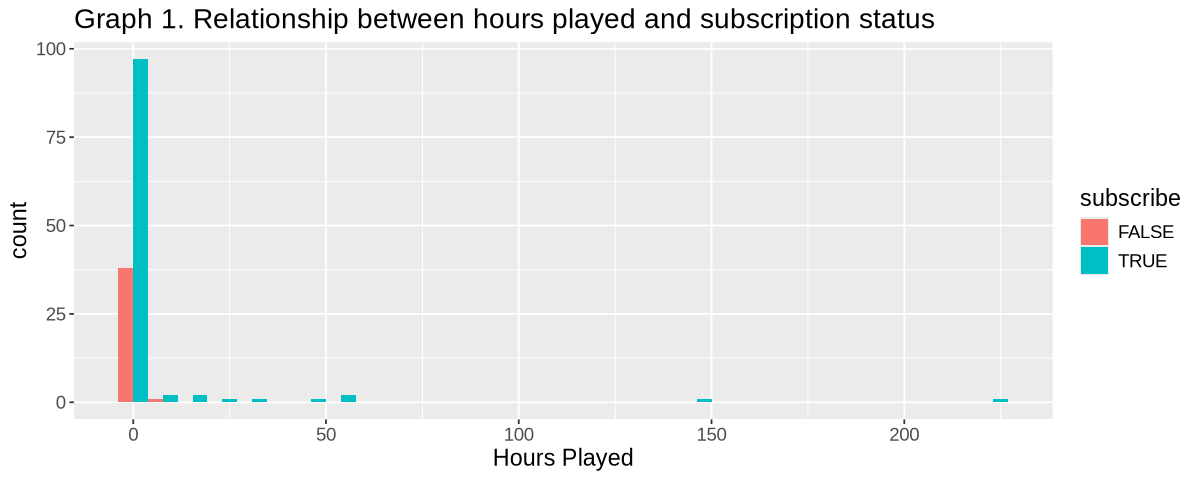

In [35]:
# Scatter graph comparing age and experience
options(repr.plot.width = 10, repr.plot.height = 4)
gender_bar <- players_training |>
            ggplot(aes(x = played_hours, fill = subscribe)) +
            geom_histogram(position = "dodge") +
            labs(x = "Hours Played", title = "Graph 1. Relationship between hours played and subscription status") + 
            theme(text = element_text(size = 14))       
gender_bar

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


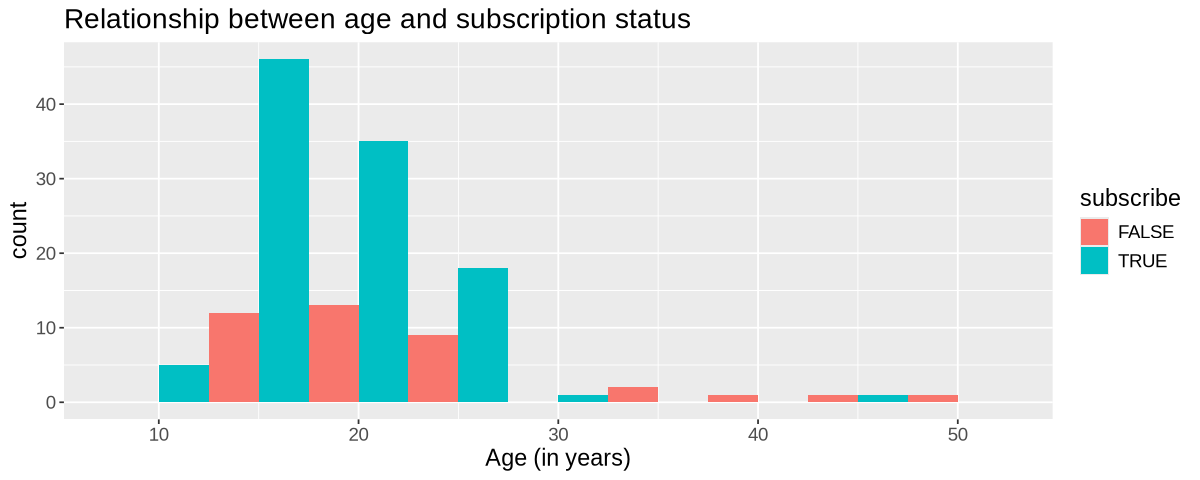

In [44]:
age_histogram <- players_training |>
            ggplot(aes(x = Age, fill = subscribe)) +
            geom_histogram(position = "dodge", binwidth = 5) +
            labs(x = "Age (in years)", title = "Relationship between age and subscription status") + 
            theme(text = element_text(size = 14))       
age_histogram

A bar plot was used to compare age and subscription to visually compare the two subscription statuses based on age. This allows use to determine and see which ages are more likely to be subscribed. As seen in the graph above, players between the ages of 15 and 28 are more likely to be subscribed. As the ages get older, the ratio of subscribed to unsubscribed is approximately the same.

# **Data Analysis**

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


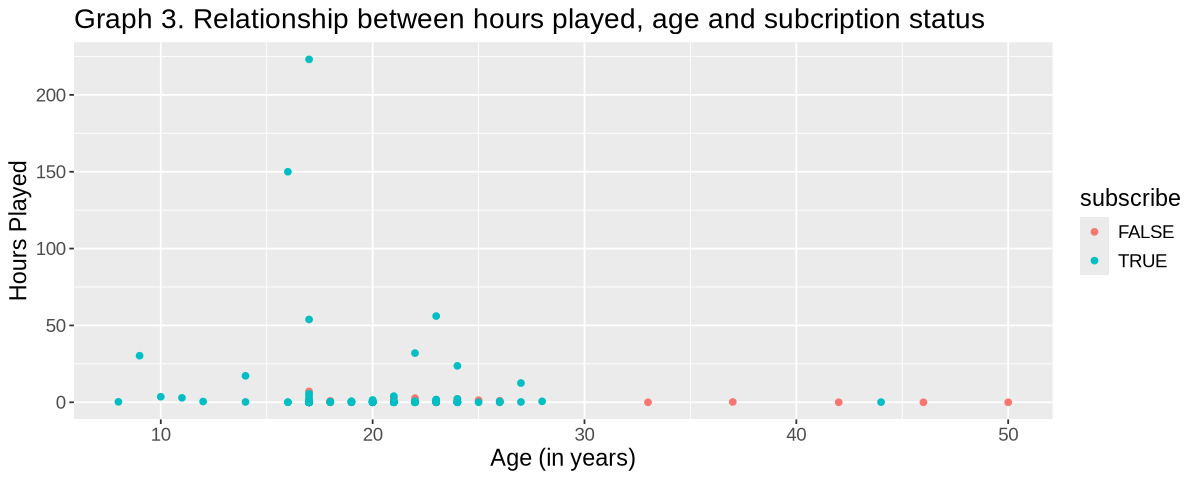

In [42]:
scatter_plot <- players_training |>
            ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
            geom_point() +
            labs(y = "Hours Played", x = "Age (in years)", title = "Graph 3. Relationship between hours played, age and subcription status") + 
            theme(text = element_text(size = 14))
    
scatter_plot

In [9]:
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
    set_engine("kknn") |>
    set_mode("classification")

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training)

players_workflow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3862069
Best kernel: rectangular
Best k: 3

In [10]:
players_test_prediction <- predict(players_workflow, players_testing) |>
    bind_cols(players_testing)

players_test_accuracy <- players_test_prediction |>
    metrics(truth = subscribe, estimate = .pred_class)
players_test_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.57142857
kap,binary,0.02093245


In [11]:
players_mat <- players_test_prediction |> 
      conf_mat(truth = subscribe, estimate = .pred_class)

players_mat

          Truth
Prediction FALSE TRUE
     FALSE     5   13
     TRUE      8   23

In [17]:
players_vfold <- vfold_cv(players_testing, v = 5, strata = subscribe)

players_resample_fit <- workflow() |>
      add_recipe(players_recipe) |>
      add_model(players_spec) |>
      fit_resamples(resamples = players_vfold) |>
    collect_metrics()

players_resample_fit

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6824242,5,0.06483369,Preprocessor1_Model1
roc_auc,binary,0.5000000,5,0.09244414,Preprocessor1_Model1


The code above performs the following:

Prediction: It makes predictions on the dataset using KNN classification when K = 3.
Evaluation: It evaluates the model's performance using accuracy metrics and a confusion matrix.
Cross-Validation: It performs cross-validation to assess the model's performance on different subsets of the data.

**Because the accuracy of the prediction is so low, we must tune the model to find the bext K value possible**

In [18]:
gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

players_results <- workflow() |>
      add_recipe(players_recipe) |>
      add_model(players_tune) |>
      tune_grid(resamples = players_vfold, grid = gridvals) |>
      collect_metrics()

players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7165657,5,0.05543936,Preprocessor1_Model01
1,roc_auc,binary,0.6369048,5,0.04664176,Preprocessor1_Model01
2,accuracy,binary,0.7369697,5,0.08627327,Preprocessor1_Model02
2,roc_auc,binary,0.5226190,5,0.07193274,Preprocessor1_Model02
3,accuracy,binary,0.6824242,5,0.06483369,Preprocessor1_Model03
3,roc_auc,binary,0.5000000,5,0.09244414,Preprocessor1_Model03
4,accuracy,binary,0.6824242,5,0.06483369,Preprocessor1_Model04
4,roc_auc,binary,0.4523810,5,0.12394681,Preprocessor1_Model04
5,accuracy,binary,0.6765657,5,0.05481639,Preprocessor1_Model05


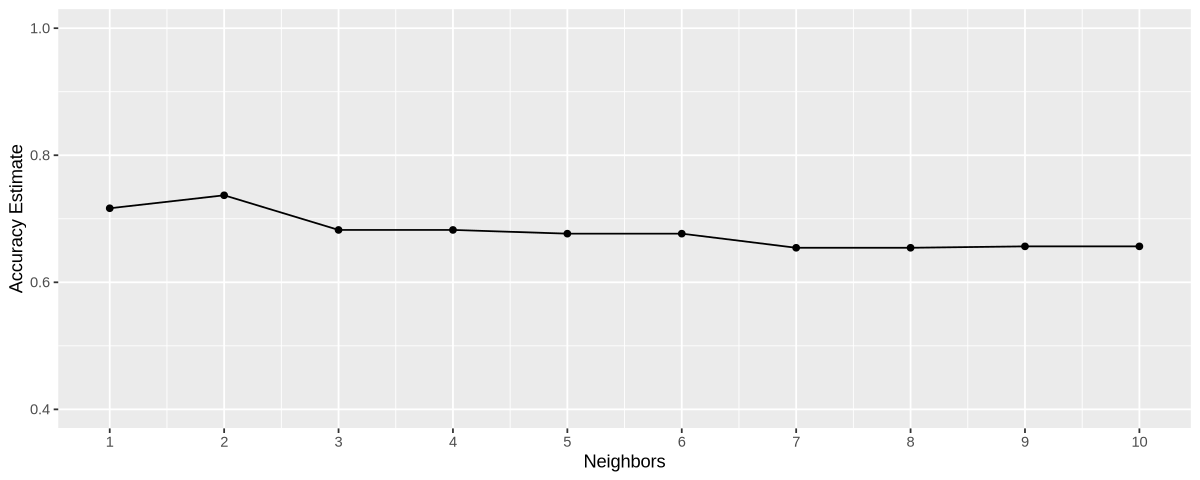

In [20]:
accuracies <- players_results |> 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

accuracy_versus_k


From the plot above, we can see that $K = 2$ provides the highest accuracy. Larger $K$ values result in a reduced accuracy estimate.